In [1]:
import pandas as pd
import numpy as np

In [ ]:
companies = pd.read_csv('companies.txt', sep='\t', encoding = 'ISO-8859-1')
rounds2=pd.read_csv('rounds2.csv',encoding='ISO-8859-1')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [ ]:
companies.head()


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [ ]:
companies['permalink'] = pd.Series(map(lambda x: x.lower() , companies['permalink']))
rounds2['company_permalink']= pd.Series(map(lambda x: x.lower(), rounds2['company_permalink']))

In [ ]:
companies['permalink'].nunique()

66368

In [ ]:
rounds2['company_permalink'].nunique()


52707

In [ ]:
rounds2= rounds2.rename(columns = {"company_permalink": "permalink"})


In [ ]:
master_frame=pd.merge(rounds2,companies,on='permalink',how='inner')
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [ ]:
len(master_frame.index)


91434

In [ ]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)


permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.88
funded_at                   0.00
raised_amount_usd          17.27
name                        0.00
homepage_url                5.36
category_list               2.98
status                      0.00
country_code                7.46
state_code                  9.42
region                      8.76
city                        8.75
founded_at                 17.91
dtype: float64

In [ ]:
master_frame = master_frame.drop('funding_round_permalink', axis=1)
master_frame = master_frame.drop('funded_at', axis=1)
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('homepage_url', axis=1)
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('city', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)

In [ ]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)


permalink              0.00
funding_round_type     0.00
raised_amount_usd     17.27
name                   0.00
category_list          2.98
status                 0.00
country_code           7.46
dtype: float64

In [ ]:
len(master_frame.index)

91434

In [ ]:
master_frame= master_frame[pd.notnull(master_frame['raised_amount_usd'])]

In [ ]:
master_frame= master_frame[pd.notnull(master_frame['country_code'])]
master_frame= master_frame[pd.notnull(master_frame['category_list'])]

In [ ]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)


permalink             0.0
funding_round_type    0.0
raised_amount_usd     0.0
name                  0.0
category_list         0.0
status                0.0
country_code          0.0
dtype: float64

In [ ]:
len(master_frame.index)

70608

In [ ]:
funding_round_type_group=master_frame.groupby('funding_round_type')

In [ ]:
type_funding=funding_round_type_group['raised_amount_usd'].mean().sort_values(ascending=False).astype('int')
type_funding

funding_round_type
post_ipo_debt            183015948
private_equity            74541650
post_ipo_equity           68916091
secondary_market          43688568
undisclosed               13419786
debt_financing            12364693
venture                   11607416
grant                      3999314
convertible_note           1413492
product_crowdfunding       1270462
angel                      1014561
seed                        749966
non_equity_assistance       544034
equity_crowdfunding         540043
Name: raised_amount_usd, dtype: int64

In [ ]:
len(master_frame.index)

70608

In [ ]:
master_for_plot=master_frame.loc[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

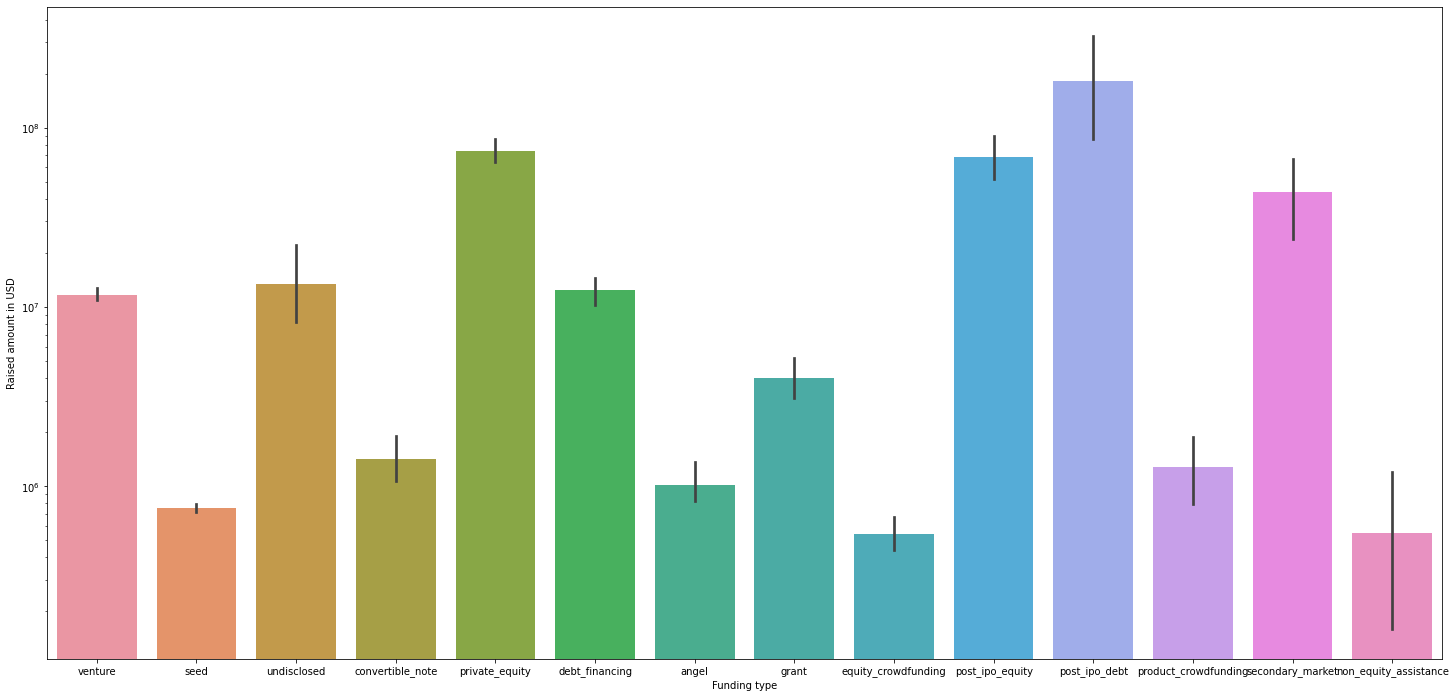

In [ ]:
plt.rc('font', size=MEDIUM_SIZE)
plt.figure(num=None,figsize=(25,12))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame,estimator=np.mean)
plt.xlabel('Funding type')
plt.ylabel('Raised amount in USD')
plt.yscale('log')
plt.show()